In [113]:
## Imports
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (Preparing and Loading)

Using Linear Regression formular to make straight line of **known parameters**

In [114]:
# create the known params
weight = 0.7
bias = 0.3

# Create range of numbers
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
print(f'Initial Shape: {X.shape}')
# add and extra diemsion
X = X.unsqueeze(dim=1)
print(f'Shape after adding extra dimension: {X.shape}')

y = weight * X + bias
# view values of X and y

X[:10], y[:10]

Initial Shape: torch.Size([50])
Shape after adding extra dimension: torch.Size([50, 1])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [115]:
# Length of X and y
len(X), len(y)

(50, 50)

### Splitting Data into training and testing sets

In [116]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize Data

In [117]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
  """
  Plots training, testing data and predictions
  """
  plt.figure(figsize=(10,8))
  # plot the training data
  plt.scatter(train_data,train_labels, c='b', s=4, label='Training Data')

  # plot testing data
  plt.scatter(test_data, test_labels, c='orange', s=4, label='Testing Data')

  # Plot predictions if they exist
  if predictions is not None:
    plt.scatter(test_data,predictions,c='red',s=4,label='Predictions')

  plt.legend(prop={'size': 14});

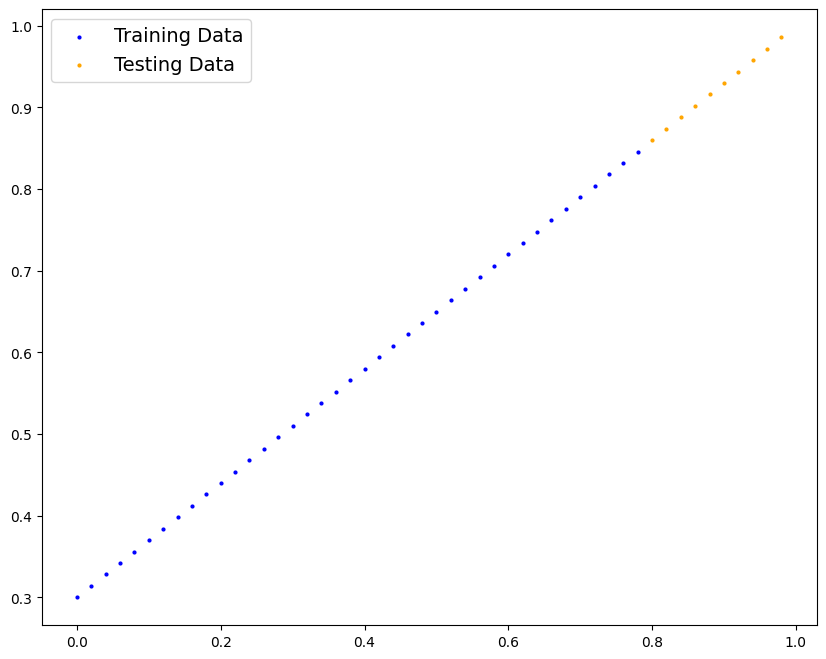

In [118]:
plot_predictions()

## 2. Build Model

In [119]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype=torch.float))

  # forward method to define model computation
  def forward(self, x: torch.tensor):
    return self.weights * x + self.bias



### Check Contents of Pytorch Model

In [120]:
### Check Contents of Pytorch Model
torch.manual_seed(42)

# create instance of the model
model_0 = LinearRegressionModel()
# check the paramaters
list(model_0.parameters())
# List named parameters
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Making Predictions with `torch.inference_mode()`

In [121]:
# making predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

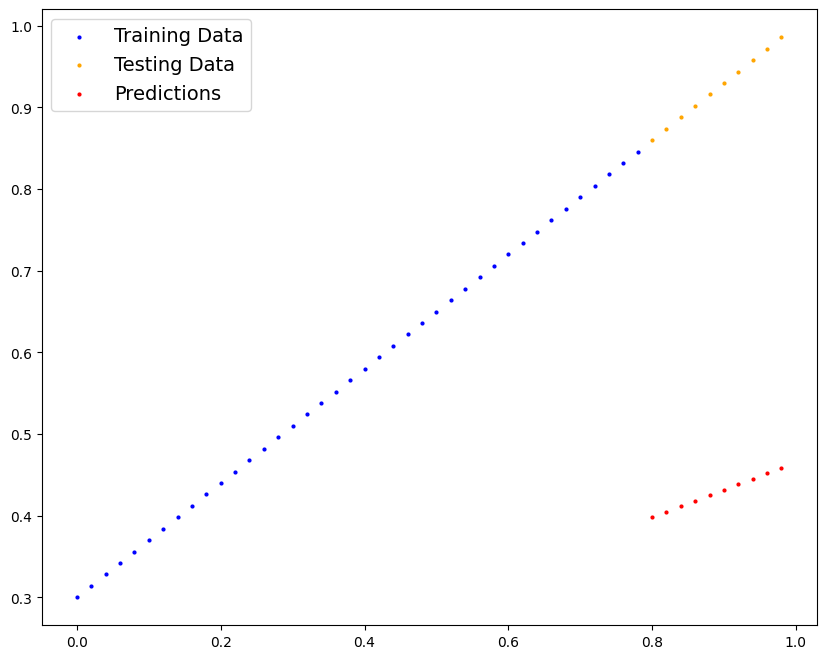

In [122]:
## plot predictions
plot_predictions( predictions = y_preds)

### 3. Train Model

*   Loss functions: Measures how wrong model predictions are from the the ideal outputs
*   Optimizer: Takes account the loss of the model and adjust the model's parameters e.g (weight & bias)



In [123]:
### setting Loss function
loss_fn = nn.L1Loss()
### setting optimizer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)


### Building Training Loop ( and testing loop) in Pytorch.

In [124]:
epochs = 200
train_loss = []
test_loss_val = []
epochs_val = []


### Training
for epoch in range(epochs):
  # setting model to train mode
  model_0.train()

  # zero the gradients
  optimizer.zero_grad()

  # make predicitons
  y_pred = model_0(X_train)

  # compute the loss and gradient
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  # compute loss gradient
  loss.backward()

  # update model parameters
  optimizer.step()

  ## Testing

  ## turn off settting not needed for testing ( drop out or batch norm layers)
  model_0.eval()
  with torch.inference_mode():

    # forward pass
    test_pred = model_0(X_test)

    # compute loss
    test_loss = loss_fn(test_pred, y_test)


  if epoch % 20 == 0:
    train_loss.append(loss.item())
    test_loss_val.append(test_loss.item())
    epochs_val.append(epoch)


    print(f"Epoch: {epoch}  | Training Loss {loss} | Test Loss: {test_loss}")

    # print out model paramaters
    print(model_0.state_dict())



Epoch: 0  | Training Loss 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 20  | Training Loss 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 40  | Training Loss 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 60  | Training Loss 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 80  | Training Loss 0.03132382780313492 | Test Loss: 0.07232122868299484
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Epoch: 100  | Training Loss 0.024458957836031914 | Test Loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 120  | Training Loss 0.01758546568453312 | Test Loss: 0.04060482233762741


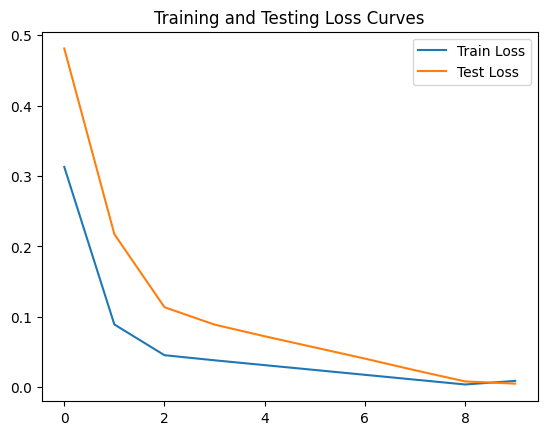

In [125]:
### Plotting Metrics
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss_val,label='Test Loss')
plt.title('Training and Testing Loss Curves')
plt.legend()

### Testing Model

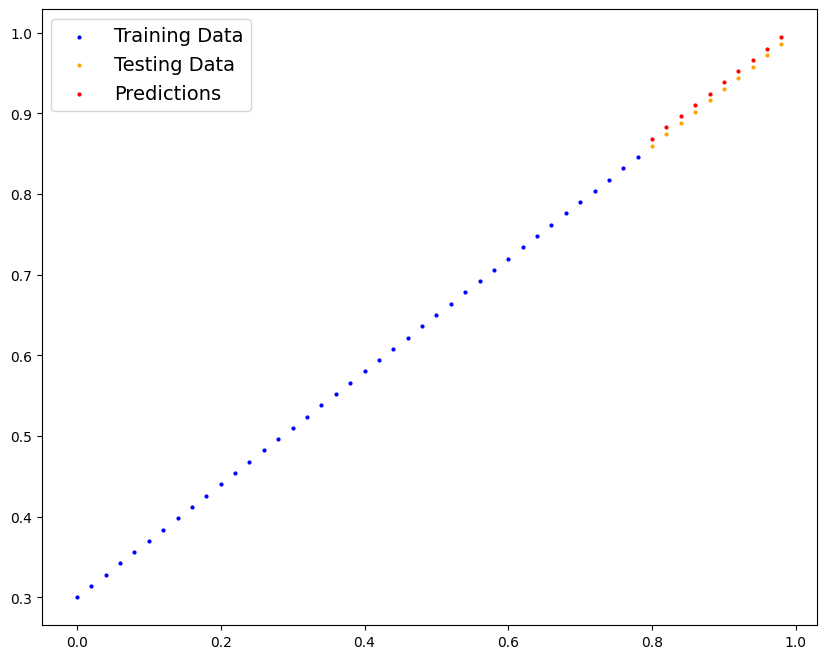

In [126]:
# making predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds
## plot predictions
plot_predictions( predictions = y_preds)

### Saving Model in Pytorch

In [127]:
from pathlib import Path

# create Model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save Model State_dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving Model to: models/01_pytorch_workflow_model_0.pt


### Loading Pytorch Model
Loading saved `state_dict`, we have to instantiate a new instance of the model class

In [128]:
# Instance of model clas
loaded_model_0 = LinearRegressionModel()

# load the saved state dict
# this will update new instance with updated paramaters\
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))




<All keys matched successfully>

In [129]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### 4. PUTTING IT ALL TOGETHER

In [130]:
## setting the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 4.1 Data

In [131]:
weight = 0.413
bias = 0.652

X = torch.arange(0,1,0.001,dtype=torch.float).unsqueeze(dim=1)
y = weight * X + bias

# splitting the data
train_idx = int(0.8 * len(X))
X_train, y_train = X[:train_idx], y[:train_idx]
X_test, y_test = X[train_idx:], y[train_idx:]
print(f"Training samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training samples: 800
Testing Samples: 200


### Visualization

In [132]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None
):
  """
  Plots training, testing data and predictions
  """
  plt.figure(figsize=(10,8))
  # plot the training data
  plt.scatter(train_data,train_labels, c='b', s=4, label='Training Data')

  # plot testing data
  plt.scatter(test_data, test_labels, c='orange', s=4, label='Testing Data')

  # Plot predictions if they exist
  if predictions is not None:
    plt.scatter(test_data,predictions,c='red',s=4,label='Predictions')

  plt.legend(prop={'size': 14});

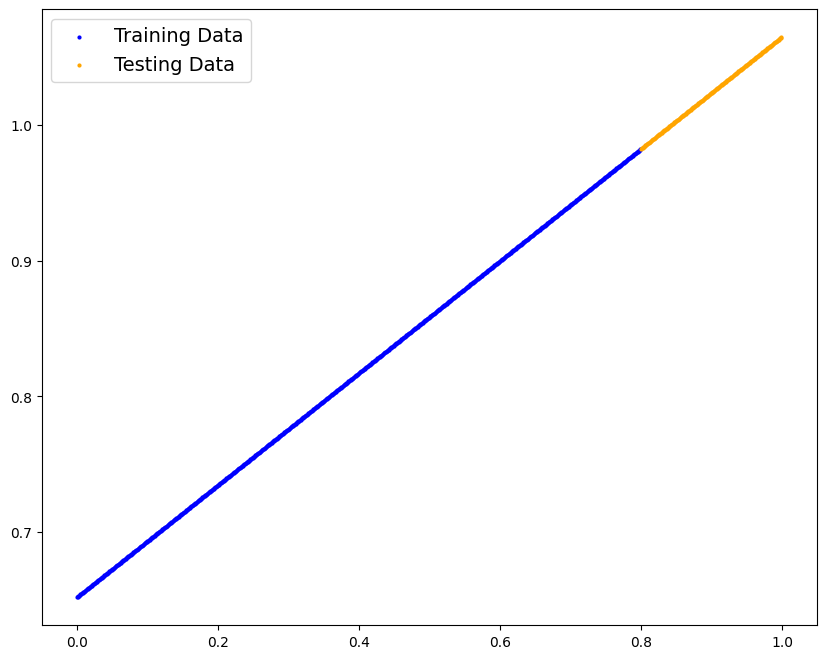

In [133]:
plot_predictions()

### 4.2 Build Model

In [134]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self,x):
    return self.linear_layer(x)

In [135]:
# create Instance of the Model
torch.manual_seed(42)
model = LinearRegression()
# transfer model to device
model.to(device)
print(model.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')), ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])


In [136]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

### 4.3 Model Training

In [137]:
# loss function
loss_fn = nn.L1Loss()
# optimizer
optimizer = torch.optim.SGD(params=model.parameters())
epochs = 1000

train_loss_vals = []
test_loss_vals = []
epoch_vals = []

# Transfer Data to Device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

## TRAINING
for epoch in range(epochs):
  model.train()
  # zero all the gradients
  optimizer.zero_grad()
  # forward pass
  y_pred = model(X_train)
  # compute loss and perform back propagation
  loss = loss_fn(y_pred,y_train)
  loss.backward()
  # update parameters
  optimizer.step()


  ### TESTING
  model.eval()
  with torch.inference_mode():
    # make predictions
    test_preds = model(X_test)
    # compute loss
    test_loss = loss_fn(test_preds,y_test)

    # print test and train values

    if epoch % 10 == 0:
       train_loss_vals.append(loss.item())
       test_loss_vals.append(test_loss.item())
       epoch_vals.append(epoch)

       print(f"Epoch: {epoch} | Training Loss: {loss} | Testing Loss: {test_loss}")


Epoch: 0 | Training Loss: 0.3184475302696228 | Testing Loss: 0.49285751581192017
Epoch: 10 | Training Loss: 0.3068518042564392 | Testing Loss: 0.47926440834999084
Epoch: 20 | Training Loss: 0.2952560484409332 | Testing Loss: 0.4656713008880615
Epoch: 30 | Training Loss: 0.28366026282310486 | Testing Loss: 0.4520781636238098
Epoch: 40 | Training Loss: 0.27206453680992126 | Testing Loss: 0.4384850859642029
Epoch: 50 | Training Loss: 0.2604687511920929 | Testing Loss: 0.42489194869995117
Epoch: 60 | Training Loss: 0.2488730251789093 | Testing Loss: 0.41129887104034424
Epoch: 70 | Training Loss: 0.23727726936340332 | Testing Loss: 0.39770570397377014
Epoch: 80 | Training Loss: 0.22568148374557495 | Testing Loss: 0.3841126561164856
Epoch: 90 | Training Loss: 0.21408574283123016 | Testing Loss: 0.3705195486545563
Epoch: 100 | Training Loss: 0.20249000191688538 | Testing Loss: 0.35692641139030457
Epoch: 110 | Training Loss: 0.1908942312002182 | Testing Loss: 0.34333336353302
Epoch: 120 | Trai

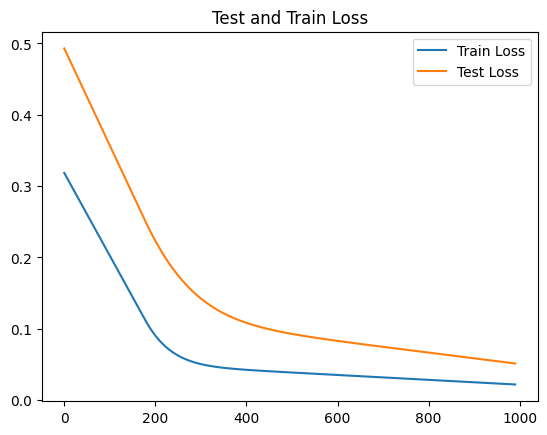

In [138]:
plt.plot(epoch_vals,train_loss_vals, label='Train Loss')
plt.plot(epoch_vals, test_loss_vals, label='Test Loss')
plt.title('Test and Train Loss')
plt.legend()

### 4.4 Saving and Loading Model

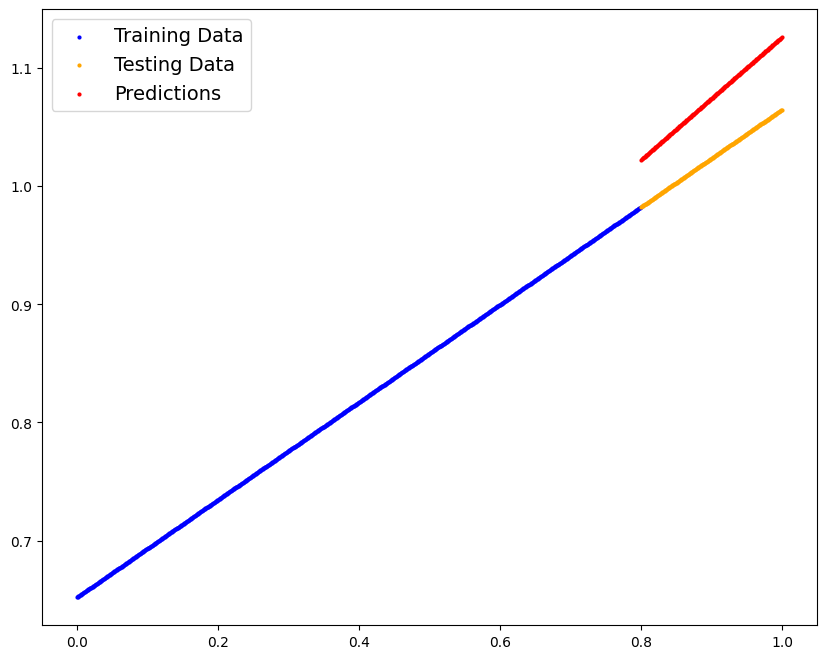

In [139]:
from pathlib import Path

# models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = '02_pytorch_workflow_model_2.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# saving the model state dict
torch.save(model.state_dict(),MODEL_SAVE_PATH)

# Loading the model
model = LinearRegression()
model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Making Predictions
model.to(device)
model.eval()
with torch.inference_mode():
  predictions = model(X_test)

#Visualize predictions
plot_predictions(predictions=predictions.cpu())

